# Modelo de MLP para Regressão 

## Importa bibliotecas e lê o dataframe

In [1]:
import pandas as pd
import numpy as np

from datetime import date

# Images
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import autocorrelation_plot
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import metrics

In [2]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [3]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [4]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [5]:
from sklearn.feature_selection import SequentialFeatureSelector

In [6]:
# Para aparecer todas as linhas e colunas do dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
dataframe = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/vendas_forecast.csv', sep=';')
dataframe.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27 00:00:00,505.730,505.7300,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27 00:00:00,258.900,258.9000,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8802111,NaN,NaN,1,R,2021-09-27 00:00:00,673.187,673.1874,22580,2220,0,0,102,3,F,NaN,NaN,NaN,33.900,27,199eb056-c41e-46bc-b68c-c3d42bd488b4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8802436,227907.0,4589694.0,1,F,2021-09-27 00:00:00,229.920,229.9200,3020,1160,0,0,7,3,F,NaN,NaN,NaN,0.240,48,8852ee59-d81b-44f2-8699-fc2b9f2140e8,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8802438,228162.0,4594076.0,1,F,2021-09-27 00:00:00,555.840,555.8400,17814,1160,0,0,7,3,F,NaN,NaN,NaN,0.120,96,e35e899c-87f8-4fdb-a53c-426b2b6f654a,NaN,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataframe.codvendedor.value_counts()

1160      2321
2348      1674
574       1614
2116      1152
1839      1026
2294       391
2220       308
2113       254
1455       160
2342       100
50          35
1612        21
999         18
2500        11
555          7
2214         5
2643         5
100000       4
2317         2
1625         1
569          1
Name: codvendedor, dtype: int64

In [9]:
dataframe.shape

(9110, 40)

In [10]:
dataframe['dtemissao'] = pd.to_datetime(dataframe['dtemissao'])

In [11]:
dataframe = dataframe.sort_values(by=['dtemissao'])

## 1º teste com vendedor 2348

In [102]:
df_2348 = dataframe[dataframe['codvendedor'] == 2348]
df_2348.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
1100,8903063,230288.0,4632892.0,1,F,2021-11-08,9936.19,9936.19,22580,2348,0,0,102,3,F,NaN,NaN,NaN,214.467,1039,15e526b2-4334-48dd-a73a-621c7dbed8c0,NaN,NaN,NaN,2021-11-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1101,8903075,85087.0,NaN,1,M,2021-11-08,14.82,14.82,22580,2348,0,0,102,3,F,MOTORISTA - PADRAO NC 219496,NaN,NaN,0.055,1,15e526b2-4334-48dd-a73a-621c7dbed8c0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,8904440,230600.0,NaN,1,M,2021-11-09,1851.11,1851.11,17814,2348,0,0,7,3,F,CARLOS HENRIQUE DA SILVA,NaN,NaN,5.215,103,95681508-0cee-4282-a8c7-a4fd60b78f83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,8904151,230600.0,NaN,1,M,2021-11-09,192.90,192.90,17814,2348,0,0,7,3,F,CARLOS HENRIQUE DA SILVA,NaN,NaN,0.250,10,dd0a74f3-e438-416d-a845-92ed88aa47a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,8911377,NaN,NaN,1,R,2021-11-10,8061.93,8061.93,28802,2348,0,0,102,3,F,NaN,NaN,NaN,116.118,837,440cff42-cd40-4203-a0a5-72a04d89c551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df_2348.shape

(1674, 40)

In [104]:
df = df_2348.groupby(df_2348['dtemissao']).sum()
df.shape

(129, 33)

In [105]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [106]:
len(test)

130

In [107]:
test.pop(129)

439.94

In [108]:
len(test)

129

In [109]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-08,17806138,315375.0,4632892.0,2,9951.01,9951.01,45160,4696,0,0,204,6,0.0,0.0,214.522,1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439.94
2021-11-09,17808591,461200.0,0.0,2,2044.01,2044.01,35628,4696,0,0,14,6,0.0,0.0,5.465,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9951.01
2021-11-10,8911377,0.0,0.0,1,8061.93,8061.93,28802,2348,0,0,102,3,0.0,0.0,116.118,837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2044.01
2021-11-11,98040842,2306114.0,46391181.0,11,5976.70,5976.70,93603,25828,0,0,76,33,0.0,0.0,118.068,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8061.93
2021-11-12,17831994,461266.0,9278817.0,2,14547.54,14547.54,57604,4696,0,0,204,6,0.0,0.0,228.030,1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5976.70


In [20]:
X = df[['vltotal', 'totvolume', 'condvenda']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 3), (33, 3), (96,), (33,))

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(3,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 42475.3008 - mean_squared_error: 5609018880.0000 - val_loss: 29909.4785 - val_mean_squared_error: 2562315776.0000
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 38038.2734 - mean_squared_error: 4953518080.0000 - val_loss: 29337.4160 - val_mean_squared_error: 2507363328.0000
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 36563.9961 - mean_squared_error: 4595709952.0000 - val_loss: 28181.8789 - val_mean_squared_error: 2352224000.0000
Epoch 4/250
76/76 [==============================] - 0s 3ms/step - loss: 34650.1133 - mean_squared_error: 4330724352.0000 - val_loss: 27575.2852 - val_mean_squared_error: 2285039872.0000
Epoch 5/250
76/76 [==============================] - 0s 3ms/step - loss: 34098.8789 - mean_squared_error: 4226282240.0000 - val_loss: 27430.0625 - val_mean_squared_error: 2271977984.0000
Epoch 6/250
76/76 [==============================] - 0s 2ms/step 

In [ ]:
y_pred = model.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {y_pred.mean():.2f}')
print(f'median pred: {np.median(y_pred):.2f}')

MAE: 38034.17
MSE: 3576155570.69
RMSE: 59800.97
R: -0.21
mean y_test: 44545.61
median y_test: 24504.65
mean pred: 14486.03
median pred: 7533.36


In [ ]:
X_test.shape

(33, 3)

In [ ]:
y_test.shape

(33,)

In [ ]:
y_pred.shape

(33, 1)

In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,totvolume,condvenda,valor real,valor predito
dtemissao,,,,,
2022-06-13,15327.830,1323,2,27504.458,5171.647461
2022-06-14,493.933,151,1,15327.830,348.777100
2022-06-15,18396.396,1516,5,493.933,6077.100586
2022-06-16,261672.826,22405,56,18396.396,87328.210938
2022-06-17,97253.969,8492,37,261672.826,32739.058594


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

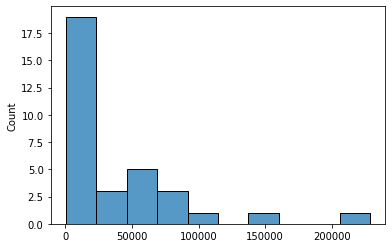

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

## Foward

In [ ]:
X = df[['vltotal',
        'codplpag',
        'numnota',
        'numcarga',
        'totpeso',
        'vltabela',
        'totvolume',
        'numpedido',
        'condvenda',
        'codcob',
        'codcli',
        'codfilial',
        'codfilialnf',
        'codfornecfrete',
        'codfornecfreteredespacho',
        'perc_comissao',
        'numpedidotv1',
        'obs',
        'obs_entrega',
        'perc_lucratividade',
        'numpedorigem',
        'vlfrete',
        'dtabertura',
        'dtfechamento',
        'codsegmento',
        'codtabvenda',
        'codplpagetico',
        'codplpaggenerico',
        'codmotorista',
        'fretedespacho',
        'freteredespacho'
        ]]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 31), (33, 31), (96,), (33,))

In [ ]:
X.shape, y.shape

((129, 13), (129,))

In [ ]:
model = MLPRegressor(random_state=42)


sfs = SequentialFeatureSelector(model,cv=10)
sfs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

SequentialFeatureSelector(cv=10, estimator=MLPRegressor(random_state=42))

In [ ]:
sfs.get_support()

array([ True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False])

In [ ]:
X.columns

Index(['vltotal', 'codplpag', 'totpeso', 'vltabela', 'totvolume', 'condvenda',
       'codcob', 'codcli', 'codfilial', 'codfilialnf', 'codfornecfrete',
       'codfornecfreteredespacho', 'perc_comissao'],
      dtype='object')

In [ ]:
X=df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]

y=df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 13), (33, 13), (96,), (33,))

In [ ]:
model = Sequential()
model.add(Dense(16, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 44635.8398 - mean_squared_error: 5756416512.0000 - val_loss: 28370.3750 - val_mean_squared_error: 2360088832.0000
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 34891.0195 - mean_squared_error: 4344751616.0000 - val_loss: 26778.4434 - val_mean_squared_error: 2135759488.0000
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 33865.3125 - mean_squared_error: 4196242176.0000 - val_loss: 26115.3281 - val_mean_squared_error: 2000023296.0000
Epoch 4/250
76/76 [==============================] - 0s 2ms/step - loss: 34445.3516 - mean_squared_error: 4118300672.0000 - val_loss: 25963.5000 - val_mean_squared_error: 2026216704.0000
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 34293.0664 - mean_squared_error: 4166935040.0000 - val_loss: 26524.6504 - val_mean_squared_error: 2086350592.0000
Epoch 6/250
76/76 [==============================] - 0s 3ms/step 

In [ ]:
y_pred = model.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {y_pred.mean():.2f}')
print(f'median pred: {np.median(y_pred):.2f}')

MAE: 45417.97
MSE: 5077981772.31
RMSE: 71259.96
R: -0.71
mean y_test: 44545.61
median y_test: 24504.65
mean pred: 29978.20
median pred: 12731.68


In [ ]:
X_test.shape

(33, 13)

In [ ]:
y_test.shape

(33,)

In [ ]:
y_pred.shape

(33, 1)

In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,
2022-06-13,15327.830,10,541.856,15327.8300,1323,2,6,39550,0,0,0.0,0.0,0.0,27504.458,5273.833984
2022-06-14,493.933,7,45.139,493.9328,151,1,3,21044,0,0,0.0,0.0,0.0,15327.830,4106.875977
2022-06-15,18396.396,705,384.438,18396.3985,1516,5,15,76021,0,0,0.0,0.0,0.0,493.933,3212.209961
2022-06-16,261672.826,2982,19209.288,261672.8441,22405,56,168,532873,0,0,0.0,0.0,0.0,18396.396,147915.406250
2022-06-17,97253.969,5217,1445.484,97253.9678,8492,37,111,359204,0,0,0.0,0.0,0.0,261672.826,3929.322266


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

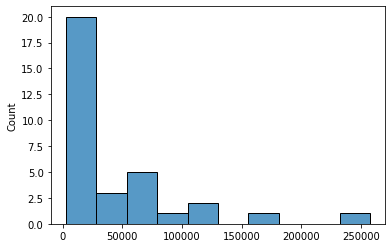

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

In [ ]:
model.save('/content/drive/MyDrive')

### Novo vendedor 1160

In [ ]:
df_1160 = dataframe[dataframe['codvendedor'] == 1160]
df_1160.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
0,8802020,227905.0,4589672.0,1,F,2021-09-27,505.73,505.73,22580,1160,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,38.585,129,407a588a-1065-45b2-82e6-ca50afd4262c,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,8802650,227867.0,4588796.0,1,ET,2021-09-27,594.24,594.24,11790,1160,0,0,7,3,F,IVANILDO DEODATO DA SILVA,NaN,NaN,0.576,96,0aceca71-f197-4746-9992-54b6ac9a98c1,27210903636036000154550010045887961541660567,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8802581,227887.0,4589312.0,1,ET,2021-09-27,527.52,527.52,30100,1160,0,0,7,3,F,JOSE EDSON DA PAZ SANTOS,NaN,NaN,0.576,48,e2b5b4b4-1c83-4c36-98ed-ecd01f70d142,27210903636036000154550010045893121539198609,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,8802598,228044.0,4592378.0,1,ET,2021-09-27,232.80,232.80,19010,1160,0,0,7,3,F,MARCIO ALEANDRO NOGUEIRA DA SILVA,NaN,NaN,0.240,48,2c54d879-df21-4aa9-98a8-fd4adbf07836,27210903636036000154550010045923781640395116,NaN,NaN,2021-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8802025,227909.0,4589715.0,1,F,2021-09-27,258.90,258.90,28802,1160,0,0,102,3,F,NaN,NaN,NaN,6.090,30,a32960a0-3190-4f8d-9c3a-8e900f229380,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_1160.shape

(2321, 40)

In [ ]:
df = df_1160.groupby(df_1160['dtemissao']).sum()
df.shape

(207, 33)

In [ ]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [ ]:
len(test)

208

In [ ]:
test.pop(207)

269.24

In [ ]:
len(test)

207

In [ ]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,15080,0,0,281,39,0.0,0.0,49.3070,783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.24
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,1160,0,0,7,3,0.0,0.0,95.2640,312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062.07
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,19720,0,0,320,51,0.0,0.0,5302.3900,15209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049.30
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,20880,0,0,718,54,0.0,0.0,4871.2804,16149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75858.84
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,1160,0,0,5,3,0.0,0.0,59973.8000,5938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69926.71


In [ ]:
X = df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((155, 13), (52, 13), (155,), (52,))

In [ ]:
pred = model.predict(X)

In [ ]:
print(f'MAE: {metrics.mean_absolute_error(y, pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, pred)):.2f}')
print(f'R: {metrics.r2_score(y, pred):.2f}')
MAPE = np.mean(100 * (np.abs(y.values-pred)/y.values))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y.mean():.2f}')
print(f'median y_test: {y.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

MAE: 23330.17
MSE: 1998713799.30
RMSE: 44706.98
R: -0.14
MAPE: 1421.91
Acurácia: -1321.91
mean y_test: 24138.34
median y_test: 12029.01
mean pred: 27125.87
median pred: 25021.29


In [ ]:
Test_Data=X
 
TestingData=pd.DataFrame(data=df)
TestingData['valor real']=y
TestingData['valor predito']=pred
TestingData.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,114431469,2963798.0,59684171.0,13,5062.070,5062.0700,183918,15080,0,0,281,39,0.0,0.0,49.3070,783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.24,269.24,26556.808594
2021-09-28,8809240,227987.0,4591551.0,1,3049.300,3049.3000,405,1160,0,0,7,3,0.0,0.0,95.2640,312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5062.07,5062.07,1487.891724
2021-09-29,149792426,3877470.0,78083515.0,17,75858.840,75884.8400,241560,19720,0,0,320,51,0.0,0.0,5302.3900,15209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3049.30,3049.30,43800.238281
2021-09-30,158699258,3650286.0,73500494.0,18,69926.710,69926.7083,404633,20880,0,0,718,54,0.0,0.0,4871.2804,16149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75858.84,75858.84,53474.699219
2021-10-01,8819317,0.0,0.0,1,14842.031,14842.0310,37028,1160,0,0,5,3,0.0,0.0,59973.8000,5938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69926.71,69926.71,45907.414062


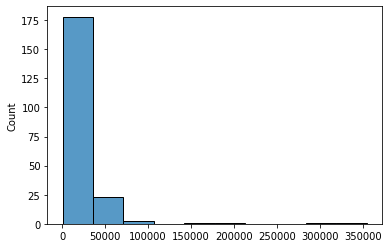

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

#### Antes do grid search

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

#### Depois do grid search

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

### Outro vendedor 574

In [83]:
df_574 = dataframe[dataframe['codvendedor'] == 574]
df_574.head()

,numpedido,numcarga,numnota,condvenda,posicao,dtemissao,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,origem,motorista,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,pedido_id,chave_nfe,perc_comissao,numpedidotv1,dtemissaonf,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho
25,8804585,227909.0,4589720.0,1,F,2021-09-27,2581.90,2581.90,28802,574,0,0,102,3,F,NaN,NaN,NaN,254.362,638,32eba715-6b04-45d2-9f9c-03f6ca3b3cad,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,8804371,227909.0,4589721.0,1,F,2021-09-27,112.52,112.52,28802,574,0,0,102,3,F,NaN,NaN,NaN,8.960,28,f97931fe-e89f-4da6-9038-81a7ca47b650,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,8804370,227905.0,4589673.0,1,F,2021-09-27,75.90,75.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,9.330,10,0c6965a9-2f68-4b85-bcba-600a4a962036,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,8804338,227905.0,4589671.0,1,F,2021-09-27,1787.90,1787.90,22580,574,0,0,102,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,157.281,424,1a7c8925-8146-4405-ba03-b5c6dc58d19e,NaN,NaN,NaN,2021-09-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,8809757,227978.0,4591338.0,1,ET,2021-09-28,47.78,47.78,21044,574,0,0,7,3,F,GEOVANE MATEUS DE ABREU SILVA,NaN,NaN,3.880,22,2f13a176-2b2a-4103-baa9-63fdd9ffa2a5,27210903636036000154550010045913381550414510,NaN,NaN,2021-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_574.shape

(1614, 40)

In [85]:
df = df_574.groupby(df_574['dtemissao']).sum()
df.shape

(199, 33)

In [86]:
# Criando janela de tempo 1 dia anterior

window = -1
history = [df['vltotal'].values[i] for i in range(window)]
test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

In [87]:
len(test)

200

In [88]:
test.pop(199)

1224.75

In [89]:
len(test)

199

In [90]:
df['test'] = test
df.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,35217664,911628.0,18358785.0,4,4558.220,4558.2200,102764,2296,0,0,408,12,0.0,0.0,429.933,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.750
2021-09-28,52854391,1367886.0,27548447.0,6,5889.416,5889.4171,84984,3444,0,0,42,18,0.0,0.0,608.073,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4558.220
2021-09-29,17626863,456138.0,9186095.0,2,11501.180,11501.1800,810,1148,0,0,191,6,0.0,0.0,341.318,1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5889.416
2021-09-30,211622429,5019788.0,101074392.0,24,166478.181,166479.7033,382792,13776,0,0,609,72,0.0,0.0,7901.189,32980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11501.180
2021-10-01,17639577,456552.0,9191649.0,2,3011.986,3011.9859,28968,1148,0,0,12,6,0.0,0.0,330.650,656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166478.181


In [101]:
X = df[['codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 12), (50, 12), (149,), (50,))

In [ ]:
pred = model.predict(X)

In [ ]:
print(f'MAE: {metrics.mean_absolute_error(y, pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, pred)):.2f}')
print(f'R: {metrics.r2_score(y, pred):.2f}')
MAPE = np.mean(100 * (np.abs(y.values-pred)/y.values))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y.mean():.2f}')
print(f'median y_test: {y.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

MAE: 26452.29
MSE: 2996503615.89
RMSE: 54740.33
R: -0.19
MAPE: 477.58
Acurácia: -377.58
mean y_test: 25274.26
median y_test: 10802.64
mean pred: 21446.97
median pred: 14948.67


In [ ]:
Test_Data=X
 
TestingData=pd.DataFrame(data=df)
TestingData['valor real']=y
TestingData['valor predito']=pred
TestingData.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,35217664,911628.0,18358785.0,4,4558.220,4558.2200,102764,2296,0,0,408,12,0.0,0.0,429.933,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.750,1224.750,14955.068359
2021-09-28,52854391,1367886.0,27548447.0,6,5889.416,5889.4171,84984,3444,0,0,42,18,0.0,0.0,608.073,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4558.220,4558.220,12785.349609
2021-09-29,17626863,456138.0,9186095.0,2,11501.180,11501.1800,810,1148,0,0,191,6,0.0,0.0,341.318,1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5889.416,5889.416,5238.104004
2021-09-30,211622429,5019788.0,101074392.0,24,166478.181,166479.7033,382792,13776,0,0,609,72,0.0,0.0,7901.189,32980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11501.180,11501.180,96249.960938
2021-10-01,17639577,456552.0,9191649.0,2,3011.986,3011.9859,28968,1148,0,0,12,6,0.0,0.0,330.650,656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166478.181,166478.181,4322.204590


#### antes do grid search

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

#### depois do grid search

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

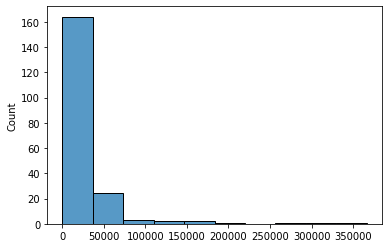

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

### Testando todos os vendedores

In [ ]:
sales = dataframe['codvendedor'].values

for sale in set(sales):
    df = dataframe[dataframe['codvendedor'] == sale]
    df = df.groupby(df['dtemissao']).sum()

    window = -1
    history = [df['vltotal'].values[i] for i in range(window)]
    test = [df['vltotal'].values[i] for i in range(window, len(df['vltotal'].values))]

    test.pop(len(test)-1)
    df['test'] = test

    y = df['test']
    X = df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]
    if len(y) < 10:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=1)
    X_train= X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    predict = model.predict(X)

    print(f'######{sale}######')
    print(f'MAE: {metrics.mean_absolute_error(y, predict):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y, predict):.2f}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, predict)):.2f}')
    print(f'R: {metrics.r2_score(y, predict):.2f}')
    MAPE = np.mean(100 * (np.abs(y.values-predict)/y.values))
    acc = 100 - MAPE
    print(f'MAPE: {MAPE:.2f}')
    print(f'Acurácia: {acc:.2f}')
    print(f'mean y: {y.mean():.2f}')
    print(f'median y: {y.median():.2f}')
    print(f'mean pred: {predict.mean():.2f}')
    print(f'median pred: {np.median(predict):.2f}')

######1160######
MAE: 27518.80
MSE: 2230004733.88
RMSE: 47222.93
R: -0.27
MAPE: 1702.91
Acurácia: -1602.91
mean y: 24138.34
median y: 12029.01
mean pred: 32360.88
median pred: 27271.61
######2342######
MAE: 11831.97
MSE: 267181924.91
RMSE: 16345.70
R: -1.83
MAPE: 465.95
Acurácia: -365.95
mean y: 9168.10
median y: 5105.84
mean pred: 12823.06
median pred: 9912.67
######2220######
MAE: 11883.16
MSE: 364999897.88
RMSE: 19104.97
R: -0.04
MAPE: 621.27
Acurácia: -521.27
mean y: 8651.08
median y: 1975.10
mean pred: 9376.30
median pred: 9375.56
######2348######
MAE: 34068.95
MSE: 3714989286.88
RMSE: 60950.71
R: -0.18
MAPE: inf
Acurácia: -inf
mean y: 39404.53
median y: 15986.29
mean pred: 20829.25
median pred: 9410.28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning:

divide by zero encountered in true_divide



######1839######
MAE: 13292.44
MSE: 302385252.47
RMSE: 17389.23
R: -0.91
MAPE: 364.05
Acurácia: -264.05
mean y: 12241.89
median y: 8585.21
mean pred: 16627.72
median pred: 13262.33
######1455######
MAE: 19355.24
MSE: 766599299.82
RMSE: 27687.53
R: -0.11
MAPE: 263.64
Acurácia: -163.64
mean y: 24384.84
median y: 15504.00
mean pred: 16433.34
median pred: 14255.51
######50######
MAE: 4359.11
MSE: 49037959.08
RMSE: 7002.71
R: -0.00
MAPE: 331.72
Acurácia: -231.72
mean y: 5379.91
median y: 3012.63
mean pred: 4955.15
median pred: 3986.55
######574######
MAE: 27520.61
MSE: 2904161162.52
RMSE: 53890.27
R: -0.15
MAPE: 544.28
Acurácia: -444.28
mean y: 25274.26
median y: 10802.64
mean pred: 24303.31
median pred: 18338.41
######2113######
MAE: 48317.52
MSE: 6983116884.31
RMSE: 83565.05
R: -0.22
MAPE: 2141.61
Acurácia: -2041.61
mean y: 49557.53
median y: 9382.37
mean pred: 18453.54
median pred: 12347.69
######2116######
MAE: 23472.08
MSE: 3435145271.42
RMSE: 58610.11
R: -0.08
MAPE: 271.63
Acurácia: -

## Grid Search

In [ ]:
X=df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]

y=df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 13), (33, 13), (96,), (33,))

In [ ]:
def Neural_network(n_neurons = 7,  activation_model = 'relu', optimizer_model  = 'Adam', loss_model = 'binary_crossentropy', activation_model_out = 'sigmoid'):

 
  neural_network = Sequential()

#-------------------------- Input  ----------------------------------------
 
  neural_network.add(Dense(units = n_neurons, activation = activation_model, input_shape = (13,)))

#---------------------------- Dropout ------------------------------------------
  neural_network.add(Dropout(rate = 0.1))



  neural_network.add(Dense(units = n_neurons, activation = activation_model))

#---------------------------- Dropout ------------------------------------------
  neural_network.add(Dropout(rate = 0.1))

#------------------------- oculta ----------------------------------------
  neural_network.add(Dense(units = n_neurons, activation = activation_model))


#---------------------------- Dropout ------------------------------------------
  neural_network.add(Dropout(rate = 0.1))

#-------------------------- Output  ---------------------------------------
  neural_network.add(Dense(units = 1, activation = activation_model_out))

#------------------------------- Compilando ---------------------------------------
  neural_network.compile(optimizer  = optimizer_model, loss = loss_model, metrics = ['mean_squared_error'])


  return neural_network

In [ ]:
grid_neural= [{'n_neurons':[6, 7, 8, 9, 10, 11, 12, 13],  'activation_model':['relu','selu','tanh'],
               'optimizer_model':['Adam'], 'loss_model':['mean_absolute_error','mean_squared_error','mean_absolute_percentage_error'], 
               'activation_model_out':['sigmoid', 'linear']}
]

In [ ]:
callback = EarlyStopping(monitor='loss', patience = 7)

model_neural = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn = Neural_network, verbose=1)

neural_cv = GridSearchCV(model_neural, grid_neural, cv = 10, scoring = 'neg_mean_squared_error'); # Usar GPU
neural_cv.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2, callbacks=callback);

In [ ]:
print("Tuned hyperparameters:(best parameters) ",neural_cv.best_params_)
print("Accuracy:",neural_cv.best_score_)

### Modelo final

**Feito no jupyter**

Tuned hyperparameters:(best parameters)  {'activation_model': 'relu', 'activation_model_out': 'sigmoid', 'loss_model': 'mean_absolute_error', 'n_neurons': 8, 'optimizer_model': 'Adam'}

Accuracy: -4626054747.253443

In [21]:
X=df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]

y=df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 13), (33, 13), (96,), (33,))

In [22]:
model = Sequential()
model.add(Dense(8, input_shape=(13,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 34784.0820 - mean_squared_error: 4192973568.0000 - val_loss: 25788.6992 - val_mean_squared_error: 2056611456.0000
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 34501.4766 - mean_squared_error: 4205983232.0000 - val_loss: 26385.0996 - val_mean_squared_error: 2089967360.0000
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 34624.6523 - mean_squared_error: 4235209216.0000 - val_loss: 26403.9062 - val_mean_squared_error: 2086157056.0000
Epoch 4/250
76/76 [==============================] - 0s 2ms/step - loss: 34609.0820 - mean_squared_error: 4175536128.0000 - val_loss: 26191.5312 - val_mean_squared_error: 2062700288.0000
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 34621.2070 - mean_squared_error: 4212770816.0000 - val_loss: 26718.7539 - val_mean_squared_error: 2114432384.0000
Epoch 6/250
76/76 [==============================] - 0s 2ms/step 

In [23]:
y_pred = model.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {y_pred.mean():.2f}')
print(f'median pred: {np.median(y_pred):.2f}')

MAE: 44699.69
MSE: 5011464184.26
RMSE: 70791.70
R: -0.69
mean y_test: 44545.61
median y_test: 24504.65
mean pred: 33191.90
median pred: 17141.88


In [24]:
X_test.shape

(33, 13)

In [25]:
y_test.shape

(33,)

In [26]:
y_pred.shape

(33, 1)

In [27]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,
2022-06-13,15327.830,10,541.856,15327.8300,1323,2,6,39550,0,0,0.0,0.0,0.0,27504.458,7821.831055
2022-06-14,493.933,7,45.139,493.9328,151,1,3,21044,0,0,0.0,0.0,0.0,15327.830,4426.734375
2022-06-15,18396.396,705,384.438,18396.3985,1516,5,15,76021,0,0,0.0,0.0,0.0,493.933,4403.757324
2022-06-16,261672.826,2982,19209.288,261672.8441,22405,56,168,532873,0,0,0.0,0.0,0.0,18396.396,165434.640625
2022-06-17,97253.969,5217,1445.484,97253.9678,8492,37,111,359204,0,0,0.0,0.0,0.0,261672.826,6755.743652


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

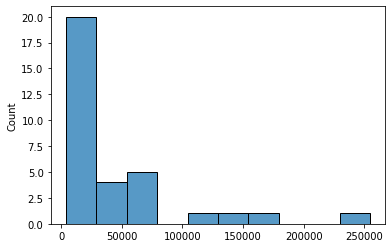

In [29]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

## NORMALIZANDO OS DADOS
**não fazer**

#### StandartScaler

* A padronização é sobre transformar os valores de recursos para cair em torno da média como 0 com desvio padrão como 1

* A padronização mantém informações úteis sobre valores discrepantes e torna o algoritmo menos sensível a eles em contraste com o dimensionamento mínimo-máximo

In [110]:
df = df.reset_index()
df.head()

,dtemissao,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test
0,2021-11-08,17806138,315375.0,4632892.0,2,9951.01,9951.01,45160,4696,0,0,204,6,0.0,0.0,214.522,1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439.94
1,2021-11-09,17808591,461200.0,0.0,2,2044.01,2044.01,35628,4696,0,0,14,6,0.0,0.0,5.465,113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9951.01
2,2021-11-10,8911377,0.0,0.0,1,8061.93,8061.93,28802,2348,0,0,102,3,0.0,0.0,116.118,837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2044.01
3,2021-11-11,98040842,2306114.0,46391181.0,11,5976.70,5976.70,93603,25828,0,0,76,33,0.0,0.0,118.068,610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8061.93
4,2021-11-12,17831994,461266.0,9278817.0,2,14547.54,14547.54,57604,4696,0,0,204,6,0.0,0.0,228.030,1626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5976.70


In [111]:
df1 = df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao','test']]

In [112]:
df1.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,test
0,9951.01,204,214.522,9951.01,1040,2,6,45160,0,0,0.0,0.0,0.0,439.94
1,2044.01,14,5.465,2044.01,113,2,6,35628,0,0,0.0,0.0,0.0,9951.01
2,8061.93,102,116.118,8061.93,837,1,3,28802,0,0,0.0,0.0,0.0,2044.01
3,5976.70,76,118.068,5976.70,610,11,33,93603,0,0,0.0,0.0,0.0,8061.93
4,14547.54,204,228.030,14547.54,1626,2,6,57604,0,0,0.0,0.0,0.0,5976.70


In [113]:
colunas = ['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao','test']

In [114]:
#Padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

dataset_padronizado = pd.DataFrame(scaler_standard.fit_transform(df1), columns=colunas)

dataset_padronizado.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,test
0,-0.525986,-0.420637,-0.394552,-0.525796,-0.465969,-0.572909,-0.572909,-0.540361,0.0,0.0,0.0,0.0,0.0,-0.695836
1,-0.667190,-0.489209,-0.466141,-0.666710,-0.664020,-0.572909,-0.572909,-0.587847,0.0,0.0,0.0,0.0,0.0,-0.525986
2,-0.559721,-0.457449,-0.428249,-0.559462,-0.509339,-0.625102,-0.625102,-0.621853,0.0,0.0,0.0,0.0,0.0,-0.667190
3,-0.596960,-0.466833,-0.427582,-0.596624,-0.557837,-0.103172,-0.103172,-0.299028,0.0,0.0,0.0,0.0,0.0,-0.559721
4,-0.443900,-0.420637,-0.389926,-0.443880,-0.340771,-0.572909,-0.572909,-0.478367,0.0,0.0,0.0,0.0,0.0,-0.596960


In [115]:
# Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()

data_normalize = pd.DataFrame(scaler_minmax.fit_transform(df1), columns=colunas)

data_normalize.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,test
0,0.038028,0.012489,0.011150,0.038028,0.043663,0.010526,0.010526,0.041225,0.0,0.0,0.0,0.0,0.0,0.001681
1,0.007811,0.000624,0.000266,0.007811,0.004366,0.010526,0.010526,0.032445,0.0,0.0,0.0,0.0,0.0,0.038028
2,0.030809,0.006120,0.006027,0.030809,0.035057,0.000000,0.000000,0.026157,0.0,0.0,0.0,0.0,0.0,0.007811
3,0.022840,0.004496,0.006128,0.022840,0.025435,0.105263,0.105263,0.085848,0.0,0.0,0.0,0.0,0.0,0.030809
4,0.055594,0.012489,0.011853,0.055594,0.068504,0.010526,0.010526,0.052688,0.0,0.0,0.0,0.0,0.0,0.022840


In [117]:
def ML_step(data):
  dataset_num_columns = data.shape[1]
  X = data.iloc[:,0:dataset_num_columns-1]
  y = data['test']

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

  model = Sequential()
  model.add(Dense(8, input_shape=(13,), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
  model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2)

  y_pred = model.predict(X_test)

  print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
  print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
  print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
  print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
  print(f'mean y_test: {y_test.mean():.2f}')
  print(f'median y_test: {y_test.median():.2f}')
  print(f'mean pred: {y_pred.mean():.2f}')
  print(f'median pred: {np.median(y_pred):.2f}')

  Test_Data=X_test
 
  TestingData=pd.DataFrame(data=X_test)
  TestingData['valor real']=y_test
  TestingData['valor predito']=y_pred

  fig = go.Figure()
  fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
  fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

  fig.show()

In [118]:
# Dataset não padronizado

ML_step(df1)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 35919.7812 - mean_squared_error: 4188926976.0000 - val_loss: 26685.3848 - val_mean_squared_error: 1778730752.0000
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 34838.4297 - mean_squared_error: 4146972672.0000 - val_loss: 26742.8555 - val_mean_squared_error: 1781007744.0000
Epoch 3/250
76/76 [==============================] - 0s 3ms/step - loss: 34277.9727 - mean_squared_error: 4134217728.0000 - val_loss: 26601.0117 - val_mean_squared_error: 1807891712.0000
Epoch 4/250
76/76 [==============================] - 0s 2ms/step - loss: 34099.4141 - mean_squared_error: 4065463552.0000 - val_loss: 26483.8652 - val_mean_squared_error: 1813848064.0000
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 33936.1484 - mean_squared_error: 4126377984.0000 - val_loss: 26340.5430 - val_mean_squared_error: 1807386368.0000
Epoch 6/250
76/76 [==============================] - 0s 2ms/step 

In [119]:
# Dataset padronizado

ML_step(dataset_padronizado)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 0.7288 - mean_squared_error: 1.1305 - val_loss: 0.5547 - val_mean_squared_error: 0.5511
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 0.6611 - mean_squared_error: 1.1331 - val_loss: 0.4949 - val_mean_squared_error: 0.5441
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 0.6015 - mean_squared_error: 1.1609 - val_loss: 0.4709 - val_mean_squared_error: 0.5783
Epoch 4/250
76/76 [==============================] - 0s 2ms/step - loss: 0.5765 - mean_squared_error: 1.2261 - val_loss: 0.4704 - val_mean_squared_error: 0.5988
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 0.5761 - mean_squared_error: 1.2221 - val_loss: 0.4750 - val_mean_squared_error: 0.6097
Epoch 6/250
76/76 [==============================] - 0s 3ms/step - loss: 0.5737 - mean_squared_error: 1.2141 - val_loss: 0.4715 - val_mean_squared_error: 0.6121
Epoch 7/250
76/76 [===============

In [120]:
# Dataset normalizado

ML_step(data_normalize)

Epoch 1/250
76/76 [==============================] - 1s 4ms/step - loss: 0.1483 - mean_squared_error: 0.0707 - val_loss: 0.1030 - val_mean_squared_error: 0.0292
Epoch 2/250
76/76 [==============================] - 0s 2ms/step - loss: 0.1244 - mean_squared_error: 0.0598 - val_loss: 0.1009 - val_mean_squared_error: 0.0285
Epoch 3/250
76/76 [==============================] - 0s 2ms/step - loss: 0.1256 - mean_squared_error: 0.0579 - val_loss: 0.0997 - val_mean_squared_error: 0.0288
Epoch 4/250
76/76 [==============================] - 0s 3ms/step - loss: 0.1236 - mean_squared_error: 0.0584 - val_loss: 0.1027 - val_mean_squared_error: 0.0305
Epoch 5/250
76/76 [==============================] - 0s 2ms/step - loss: 0.1235 - mean_squared_error: 0.0594 - val_loss: 0.1020 - val_mean_squared_error: 0.0298
Epoch 6/250
76/76 [==============================] - 0s 2ms/step - loss: 0.1237 - mean_squared_error: 0.0592 - val_loss: 0.1018 - val_mean_squared_error: 0.0294
Epoch 7/250
76/76 [===============

In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,codplpag,totpeso,vltabela,totvolume,condvenda,codcob,codcli,codfilial,codfilialnf,codfornecfrete,codfornecfreteredespacho,perc_comissao,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,
2022-06-13,15327.830,10,541.856,15327.8300,1323,2,6,39550,0,0,0.0,0.0,0.0,27504.458,8428.363281
2022-06-14,493.933,7,45.139,493.9328,151,1,3,21044,0,0,0.0,0.0,0.0,15327.830,4426.477051
2022-06-15,18396.396,705,384.438,18396.3985,1516,5,15,76021,0,0,0.0,0.0,0.0,493.933,5214.475586
2022-06-16,261672.826,2982,19209.288,261672.8441,22405,56,168,532873,0,0,0.0,0.0,0.0,18396.396,162154.546875
2022-06-17,97253.969,5217,1445.484,97253.9678,8492,37,111,359204,0,0,0.0,0.0,0.0,261672.826,11761.132812


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

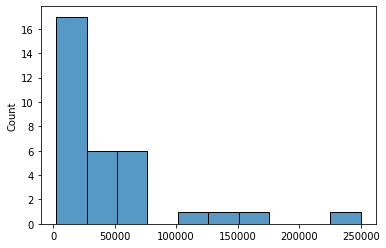

In [ ]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

## Modelo atual: Regressão Linear 
para comparar com o resultado de MLPRegressor

In [73]:
X = df[['vltotal']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 1), (33, 1), (96,), (33,))

In [74]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred = regressor.predict(X_test)

print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
print(f'mean y_test: {y_test.mean():.2f}')
print(f'median y_test: {y_test.median():.2f}')
print(f'mean pred: {y_pred.mean():.2f}')
print(f'median pred: {np.median(y_pred):.2f}')

MAE: 35432.96
MSE: 2762957966.44
RMSE: 52563.85
R: 0.07
mean y_test: 44545.61
median y_test: 24504.65
mean pred: 38699.57
median pred: 34757.01


In [76]:
X_test.shape

(33, 1)

In [77]:
y_test.shape

(33,)

In [78]:
y_pred.shape

(33,)

In [79]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=X_test)
TestingData['valor real']=y_test
TestingData['valor predito']=y_pred
TestingData.head()

,vltotal,valor real,valor predito
dtemissao,,,
2022-06-13,15327.830,27504.458,33504.056681
2022-06-14,493.933,15327.830,30790.107571
2022-06-15,18396.396,493.933,34065.468963
2022-06-16,261672.826,18396.396,78574.329365
2022-06-17,97253.969,261672.826,48492.927917


In [80]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

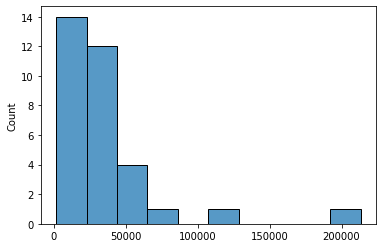

In [81]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

#### Vendedor 574 

In [98]:
X = df[['vltotal']]
y = df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149, 1), (50, 1), (149,), (50,))

In [99]:
pred = regressor.predict(X)

In [100]:
print(f'MAE: {metrics.mean_absolute_error(y, pred):.2f}')
print(f'MSE: {metrics.mean_squared_error(y, pred):.2f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y, pred)):.2f}')
print(f'R: {metrics.r2_score(y, pred):.2f}')
MAPE = np.mean(100 * (np.abs(y.values-pred)/y.values))
acc = 100 - MAPE
print(f'MAPE: {MAPE:.2f}')
print(f'Acurácia: {acc:.2f}')
print(f'mean y_test: {y.mean():.2f}')
print(f'median y_test: {y.median():.2f}')
print(f'mean pred: {pred.mean():.2f}')
print(f'median pred: {np.median(pred):.2f}')

MAE: 30895.02
MSE: 2706488511.71
RMSE: 52023.92
R: -0.07
MAPE: 743.21
Acurácia: -643.21
mean y_test: 25274.26
median y_test: 10802.64
mean pred: 35323.81
median pred: 32676.15


In [94]:
Test_Data=X
 
TestingData=pd.DataFrame(data=df)
TestingData['valor real']=y
TestingData['valor predito']=pred
TestingData.head()

,numpedido,numcarga,numnota,condvenda,vltotal,vltabela,codcli,codvendedor,codfilial,codfilialnf,codplpag,codcob,codfornecfrete,codfornecfreteredespacho,totpeso,totvolume,perc_comissao,numpedidotv1,tstamp,obs,obs_entrega,perc_lucratividade,numpedorigem,vlfrete,dtabertura,dtfechamento,codsegmento,codtabvenda,codplpagetico,codplpaggenerico,codmotorista,fretedespacho,freteredespacho,test,valor real,valor predito
dtemissao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-27,35217664,911628.0,18358785.0,4,4558.220,4558.2200,102764,2296,0,0,408,12,0.0,0.0,429.933,1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1224.750,1224.750,31533.692894
2021-09-28,52854391,1367886.0,27548447.0,6,5889.416,5889.4171,84984,3444,0,0,42,18,0.0,0.0,608.073,1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4558.220,4558.220,31777.243068
2021-09-29,17626863,456138.0,9186095.0,2,11501.180,11501.1800,810,1148,0,0,191,6,0.0,0.0,341.318,1846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5889.416,5889.416,32803.948452
2021-09-30,211622429,5019788.0,101074392.0,24,166478.181,166479.7033,382792,13776,0,0,609,72,0.0,0.0,7901.189,32980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11501.180,11501.180,61157.906552
2021-10-01,17639577,456552.0,9191649.0,2,3011.986,3011.9859,28968,1148,0,0,12,6,0.0,0.0,330.650,656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166478.181,166478.181,31250.800247


In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=TestingData['valor real'],
                    mode='lines',
                    name='real'))
fig.add_trace(go.Scatter(y=TestingData['valor predito'],
                    mode='lines',
                    name='predito'))

fig.show()

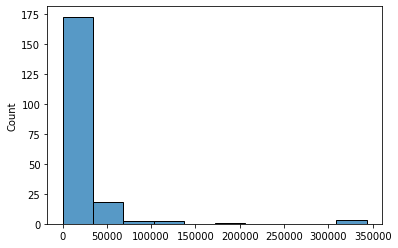

In [96]:
absolute_error = abs(TestingData['valor real'] - TestingData['valor predito'])

sns.histplot(absolute_error, bins=10)

## Cross Validation

In [69]:
X=df[['vltotal', 'codplpag','totpeso', 'vltabela',
       'totvolume','condvenda', 'codcob', 'codcli', 'codfilial',
       'codfilialnf', 'codfornecfrete', 'codfornecfreteredespacho',
       'perc_comissao']]

y=df['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 13), (33, 13), (96,), (33,))

In [70]:
X_array = X_train.to_numpy()
X_array

array([[3.1077990e+03, 2.3800000e+02, 8.4900000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0004400e+03, 4.0000000e+00, 7.5835000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2176219e+04, 3.3100000e+02, 1.0245320e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [7.1007600e+02, 2.0400000e+02, 9.9730000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0380146e+04, 4.2000000e+01, 1.2138880e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4866816e+04, 1.3300000e+02, 1.1415630e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [59]:
results_ann_cv = []

kf = RepeatedKFold(n_splits = 10, n_repeats = 10, random_state= 42)

for lines_train, lines_test in kf.split(X_array):

  X_train, X_test = X_array[lines_train], X_array[lines_test]
  y_train, y_test = y.iloc[lines_train], y.iloc[lines_test]

  model = Sequential()
  model.add(Dense(8, input_shape=(13,), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='linear'))


  callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 7)

  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
  model.fit(X_train, y_train, epochs=250, batch_size=1, verbose=1, validation_split=0.2, callbacks = callback)

  y_pred = model.predict(X_test)
  y_pred = (y_pred >= 0.5)
  print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}')
  print(f'MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}')
  print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}')
  print(f'R: {metrics.r2_score(y_test, y_pred):.2f}')
  print(f'mean y_test: {y_test.mean():.2f}')
  print(f'median y_test: {y_test.median():.2f}')
  print(f'mean pred: {y_pred.mean():.2f}')
  print(f'median pred: {np.median(y_pred):.2f}')
  results_ann_cv.append(metrics.mean_absolute_error(y_test, y_pred))
  print('------------------------------------------')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 7/250
92/92 [==============================] - 0s 3ms/step - loss: 37241.9141 - mean_squared_error: 4739870720.0000 - val_loss: 30168.9238 - val_mean_squared_error: 1795433600.0000
Epoch 8/250
92/92 [==============================] - 0s 2ms/step - loss: 37121.4492 - mean_squared_error: 4703551488.0000 - val_loss: 30062.3027 - val_mean_squared_error: 1756793216.0000
Epoch 9/250
92/92 [==============================] - 0s 3ms/step - loss: 37153.9180 - mean_squared_error: 4681382912.0000 - val_loss: 30078.1035 - val_mean_squared_error: 1786349568.0000
Epoch 10/250
92/92 [==============================] - 0s 3ms/step - loss: 36963.8242 - mean_squared_error: 4680422400.0000 - val_loss: 30030.1562 - val_mean_squared_error: 1740555776.0000
Epoch 11/250
92/92 [==============================] - 0s 2ms/step - loss: 37128.8789 - mean_squared_error: 4597780480.0000 - val_loss: 30011.5410 - val_mean_squared_error: 1739223424.0000
Epoc

In [60]:
len(results_ann_cv)

100

In [61]:
print(results_ann_cv)

[13157.127923076923, 63314.78500000002, 38527.87084615385, 16691.788923076925, 15338.690461538463, 56830.58838461538, 45166.09746153846, 57076.40638461538, 33557.70076923077, 55621.96299999999, 61237.414, 37200.67276923076, 32448.737615384613, 64954.965846153835, 44552.54815384616, 24222.37846153846, 12480.985076923078, 55705.13853846153, 20237.202384615382, 41128.06075, 33580.01453846154, 30235.902000000002, 27977.773307692303, 66036.47200000001, 53622.61038461538, 31578.428999999996, 35895.39592307692, 48296.83661538463, 37468.53423076923, 28505.141833333328, 33409.81538461539, 31463.90630769231, 38040.02207692307, 36574.673923076916, 67500.9743076923, 30517.83692307692, 35334.61576923077, 24120.54, 41552.724230769236, 56863.40583333333, 28861.55946153846, 20915.067384615384, 34998.03892307692, 52685.97230769232, 23537.926384615384, 22612.180076923072, 58016.55676923077, 32636.178230769234, 50136.99323076923, 72154.26166666666, 51469.61807692308, 44817.060999999994, 14317.19738461538

In [62]:
np.asarray(results_ann_cv).shape

(100,)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



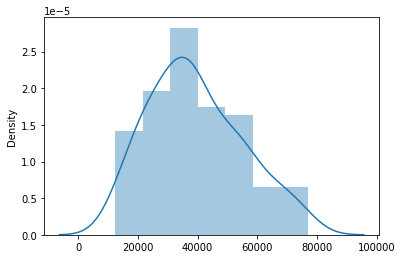

In [63]:
sns.distplot(results_ann_cv);

In [64]:
sum(results_ann_cv)/len(results_ann_cv)

39413.16872602564

In [65]:
results_ann_cv_array = np.array(results_ann_cv)

In [66]:
from scipy.stats import norm
from scipy import stats

In [67]:
intervalo_ann = norm.interval(0.95, results_ann_cv_array.mean(),
                             stats.sem(results_ann_cv_array))
intervalo_ann

(36330.993417984275, 42495.344034067)

In [68]:
df_describe = pd.DataFrame(results_ann_cv)
df_describe.describe()

,0
count,100.000000
mean,39413.168726
std,15725.673188
min,12480.985077
25%,27927.356865
50%,37467.954731
75%,51170.710596
max,76868.808769
